In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

import warnings as warn
from warnings import filterwarnings

filterwarnings("ignore")

In [73]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install tabulate --user

In [2]:
df= pd.read_csv("IRIS.csv") 

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
sepal_length,float64,0,0.000000,35,150,4.300000,7.900000,5.843333
sepal_width,float64,0,0.000000,23,150,2.000000,4.400000,3.054000
petal_length,float64,0,0.000000,43,150,1.000000,6.900000,3.758667
petal_width,float64,0,0.000000,22,150,0.100000,2.500000,1.198667
species,object,0,0.000000,3,150,nan,nan,nan


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Data Visuvalization

Text(0.5, 1.0, 'Distribution of Species')

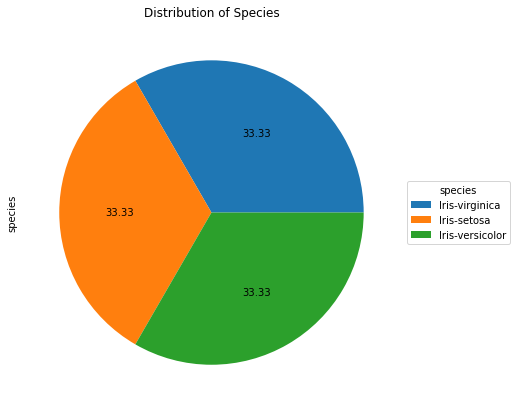

In [12]:
plt.figure(figsize=(10,7))
df["species"].value_counts().plot(kind='pie',autopct='%.2f',labels=None)
plt.legend(df["species"].value_counts().index, title="species", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Species")

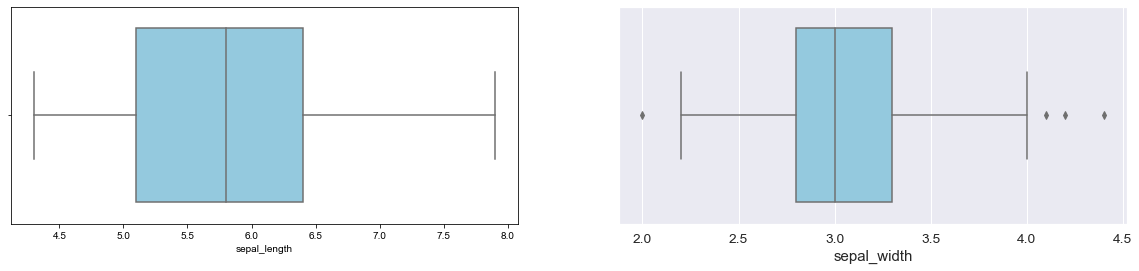

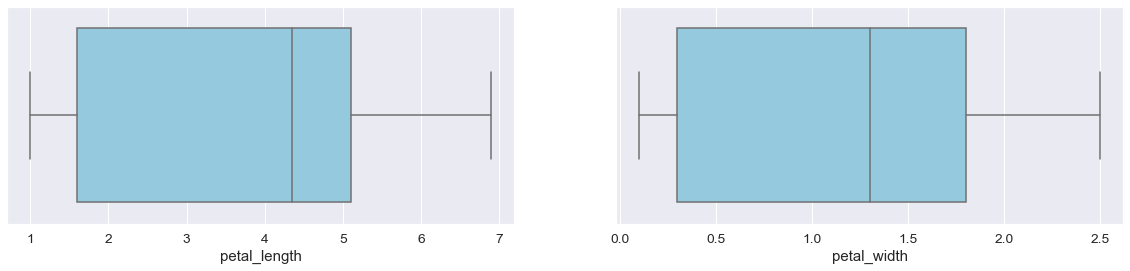

In [13]:
Num = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width']

j = 0
while j < 5:
    fig = plt.figure (figsize = [20 , 4])
    plt.subplot(1, 2, 1)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    plt.subplot(1, 2, 2)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    if j == 4:
        break
    plt.show()

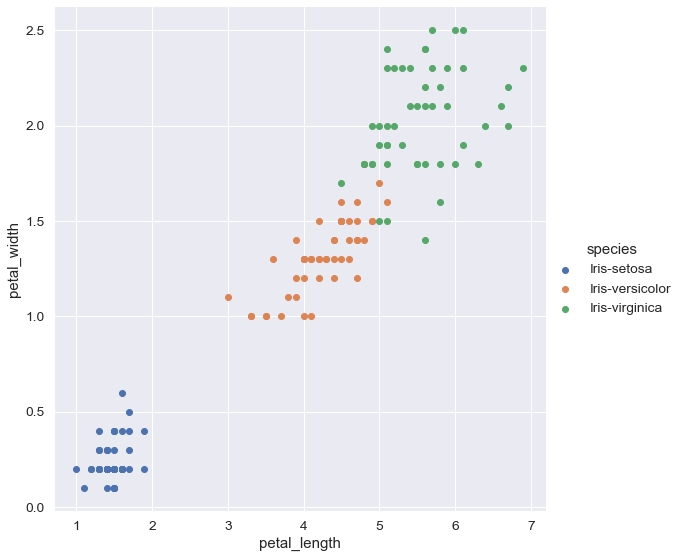

In [14]:
# FaectGrid (to create multiple plots (often of the same type, like scatter plots) arranged in a grid)
sns.FacetGrid(df, hue ="species", height=8, aspect=1).map(plt.scatter, 'petal_length','petal_width').add_legend()

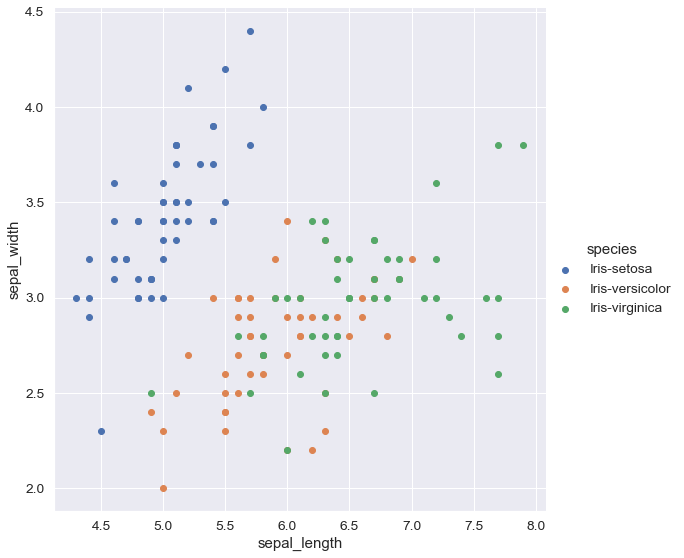

In [15]:
sns.FacetGrid(df, hue ="species", height=8, aspect=1).map(plt.scatter, 'sepal_length','sepal_width').add_legend()

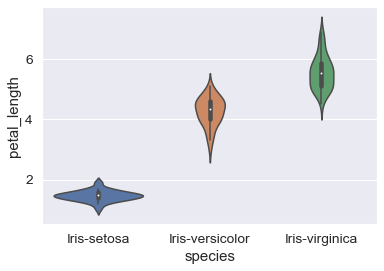

In [16]:
sns.violinplot(x="species",y="petal_length",data=df)
plt.show()

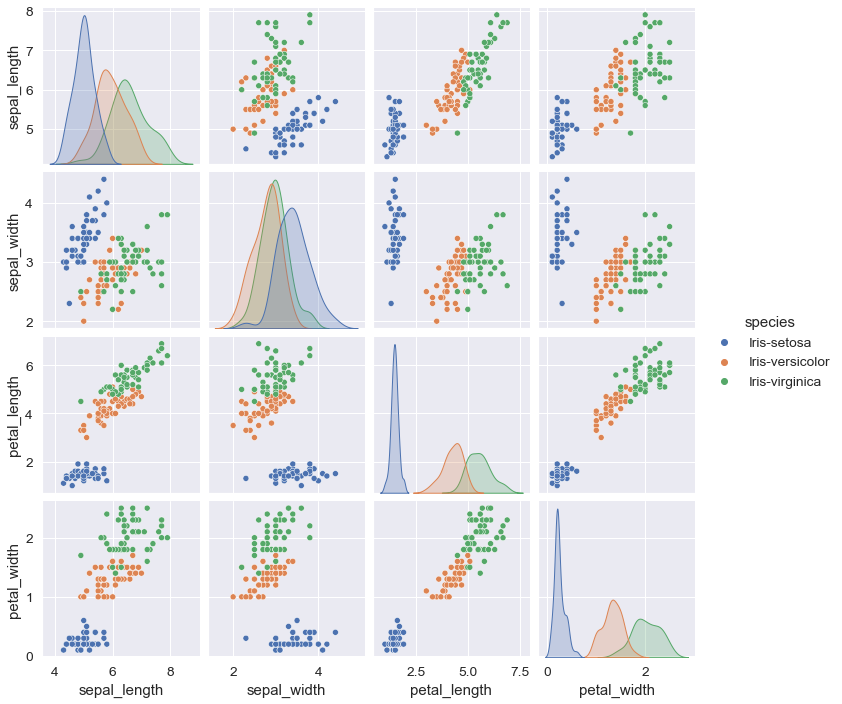

In [17]:
# Pairplot
sns.pairplot(df,hue='species')

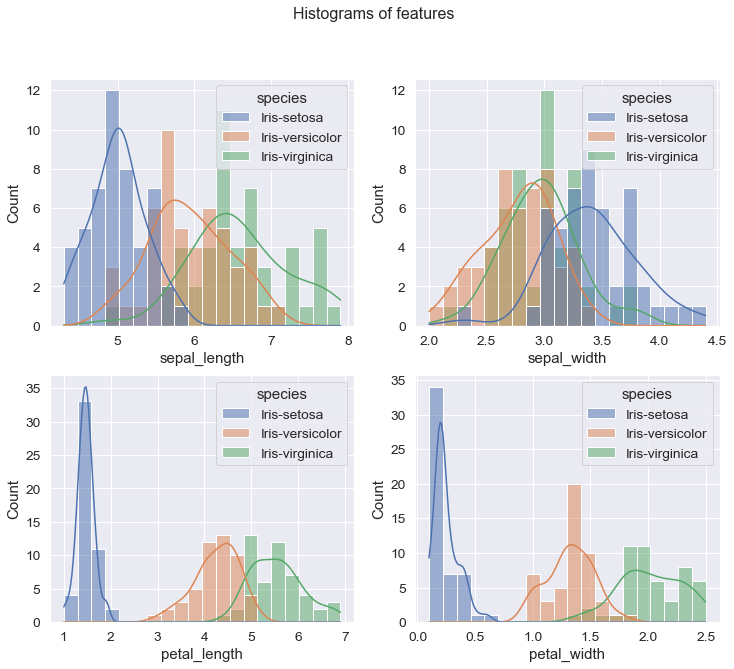

In [18]:
num_columns = list(df.select_dtypes(include=['float']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,hue='species',ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of features', fontsize=16)
plt.show()

## Encoding

In [19]:
df["species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [20]:
# Iris-setosa ---> 0
# Iris-versicolor  -----> 1
# Iris-virginica -------> 2
df["species"]=df["species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

## Checking Correlation

In [21]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

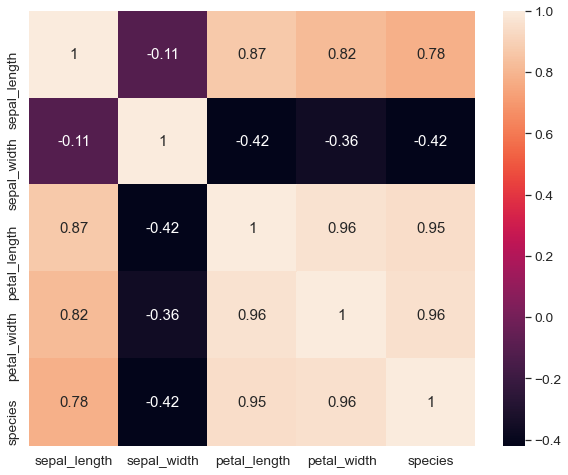

In [22]:
# Using heatmap
plt.figure(figsize=(10, 8))
cor=df.corr()
sns.heatmap(cor,annot=True)

## Train_Test_Split

In [23]:
X = pd.DataFrame(df , columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
y = df["species"].values.reshape(-1,1)

In [24]:
Scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
Norm1 = Scaler.fit_transform(df)
Norm1_df=pd.DataFrame (Norm1 , columns = ["species" , "sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
Norm1_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.5 , random_state = 0)

In [26]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) : 
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(Ytest, Ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(Ytest, Ypredicted , average=avg) * 100,2)}")

## KNN Classifier

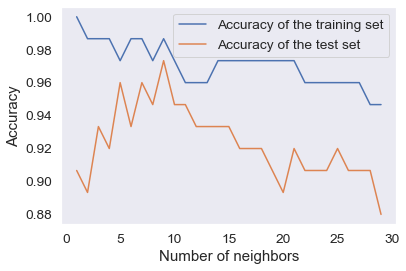

In [34]:
training_acc = []
test_acc = []

neighbors_setting = range(1,30)

for n_neighbors in neighbors_setting:
    KNN = KNeighborsClassifier(n_neighbors = n_neighbors)
    KNN.fit(X_train , y_train.ravel())
    training_acc.append(KNN.score(X_train , y_train))
    test_acc.append(KNN.score(X_test , y_test))
                    
plt.plot(neighbors_setting , training_acc , label = "Accuracy of the training set")
plt.plot(neighbors_setting , test_acc , label = "Accuracy of the test set")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(linestyle='-')
plt.legend()

In [35]:
parameters = {"n_neighbors" : range(1,50)}
grid_kn = GridSearchCV(estimator = KNN , param_grid = parameters , scoring = "accuracy" , cv = 5 , verbose = 1 , n_jobs = -1)

grid_kn.fit(X_train , y_train.ravel())
grid_kn.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


{'n_neighbors': 3}

In [41]:
K = 3
KNN = KNeighborsClassifier(K)
KNN.fit(X_train , y_train.ravel())
y_pred_KNN = KNN.predict(X_test)
print("K-Nearest Neighbors : ")
Evaluate_Performance(KNN, X_train, X_test, y_train, y_test)

K-Nearest Neighbors : 

 • Training Accuracy Score :  98.67
 • Cross Validation Score : 97.14
 • Testing Accuracy Score :93.33
 • Precision Score is : 93.63
 • Recall Score is : 93.33
 • F1-Score Score is : 93.27


In [42]:
KNN_r = cross_val_score (KNN, X, y, cv = 10)
K = np.std(KNN_r)
print(K)

0.04472135954999579


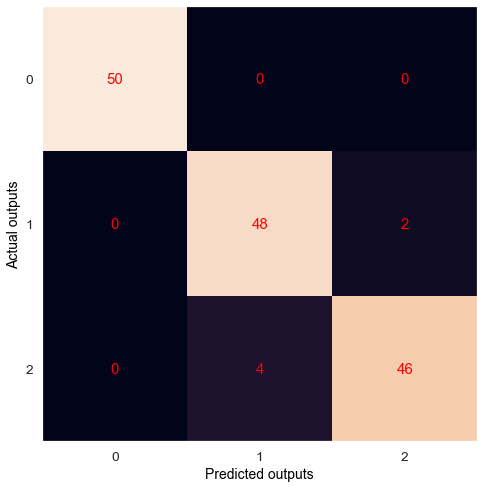

In [38]:
cm = confusion_matrix (y , KNN.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

## Logistic Regression

In [43]:
LogReg = LogisticRegression(solver = "liblinear" , C=50)
LogReg.fit(X_train , y_train.ravel())
y_pred_LR = LogReg.predict(X_test)
print("Logistic Regression : ")
Evaluate_Performance(LogReg, X_train, X_test, y_train, y_test)

Logistic Regression : 

 • Training Accuracy Score :  98.67
 • Cross Validation Score : 97.32
 • Testing Accuracy Score :94.67
 • Precision Score is : 94.67
 • Recall Score is : 94.67
 • F1-Score Score is : 94.67


In [70]:
kfold = KFold(37)
LR_r = cross_val_score (LogReg, X, y, cv = kfold)
print(np.std(LR_r))

0.10335850365390781


## Naive Bayes

In [44]:
NB = GaussianNB()
NB.fit(X_train , y_train.ravel())
y_pred_NB = NB.predict(X_test)
print("Naive Bayes : ")
Evaluate_Performance(NB, X_train, X_test, y_train, y_test)

Naive Bayes : 

 • Training Accuracy Score :  97.33
 • Cross Validation Score : 97.14
 • Testing Accuracy Score :94.67
 • Precision Score is : 95.29
 • Recall Score is : 94.67
 • F1-Score Score is : 94.59


In [45]:
NB_r = cross_val_score (NB, X, y, cv = 10)
N = np.std(NB_r)
print(N)

0.04268749491621898


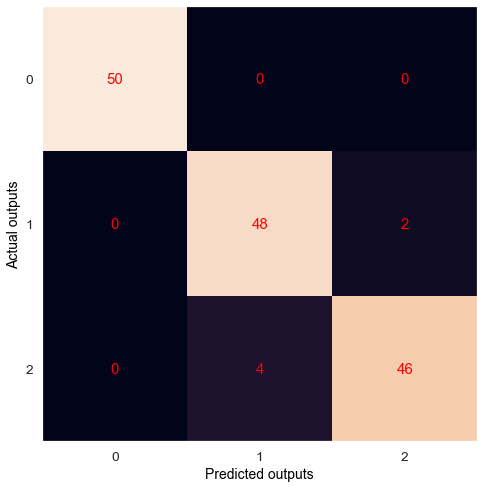

In [46]:
cm = confusion_matrix (y , NB.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

## Support Vector Machine

In [47]:
SVM = SVC()
SVM.fit(X_train , y_train)
y_pred_SVM = SVM.predict(X_test)
print("SVM : ")
Evaluate_Performance(SVM, X_train, X_test, y_train, y_test)

SVM : 

 • Training Accuracy Score :  96.0
 • Cross Validation Score : 95.71
 • Testing Accuracy Score :94.67
 • Precision Score is : 94.8
 • Recall Score is : 94.67
 • F1-Score Score is : 94.64


In [48]:
SVM_r = cross_val_score (SVM, X, y, cv = 10)
S = np.std(SVM_r)
print(S)

0.03265986323710904


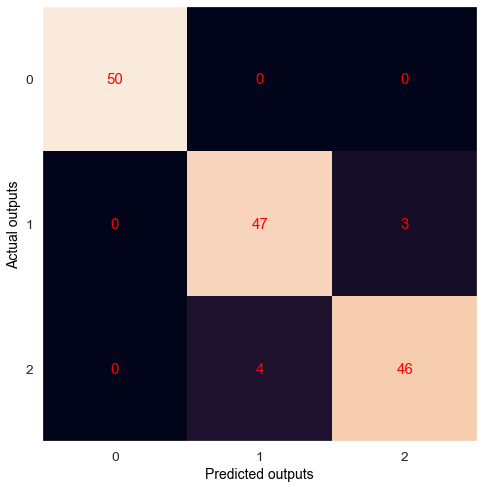

In [49]:
cm = confusion_matrix (y , SVM.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

## Decision Tree Classifier

In [50]:
DT = DecisionTreeClassifier(max_depth = 3)
DT = DT.fit(X_train , y_train)
y_pred_DT = DT.predict(X_test)
print("Decision Tree : ")
Evaluate_Performance(DT, X_train, X_test, y_train, y_test)

Decision Tree : 

 • Training Accuracy Score :  98.67
 • Cross Validation Score : 94.46
 • Testing Accuracy Score :96.0
 • Precision Score is : 96.03
 • Recall Score is : 96.0
 • F1-Score Score is : 95.99


In [51]:
DT_r = cross_val_score (DT, X, y, cv = 10)
D = np.std(DT_r)
print(D)

0.03265986323710903


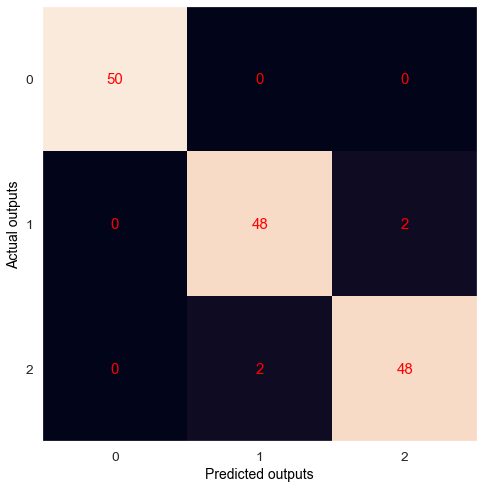

In [57]:
cm = confusion_matrix (y , DT.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

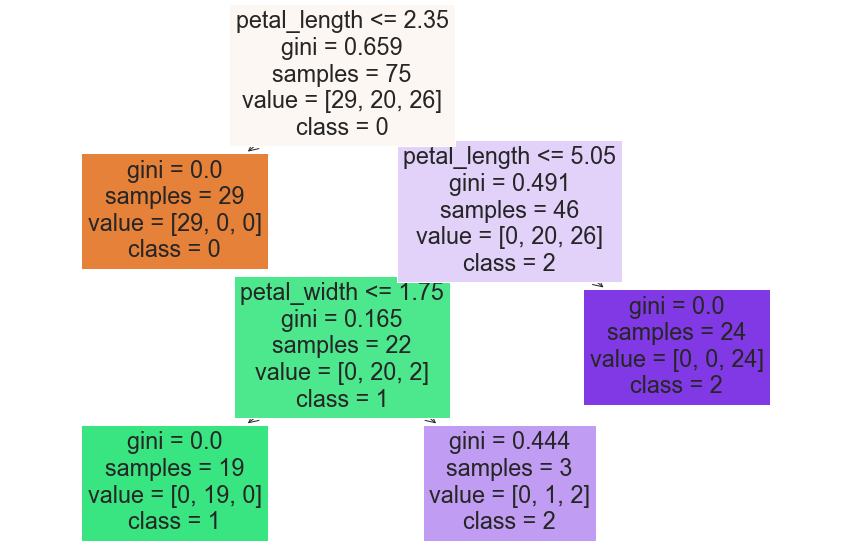

In [83]:
#white box one
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (15 , 10))
plot = tree.plot_tree (DT , feature_names = F , class_names = T , filled = True)

## Random Forest

In [59]:
RF = RandomForestClassifier(n_estimators = 400, max_depth = 3)
RF = RF.fit(X_train , y_train)
y_pred_RF = RF.predict(X_test)
print("Random Forest : ")
Evaluate_Performance(RF, X_train, X_test, y_train, y_test)

Random Forest : 

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 95.71
 • Testing Accuracy Score :94.67
 • Precision Score is : 94.8
 • Recall Score is : 94.67
 • F1-Score Score is : 94.64


In [61]:
RF_r = cross_val_score (RF, X, y, cv = 10)
R = np.std(RF_r)
print(R)

0.044221663871405324


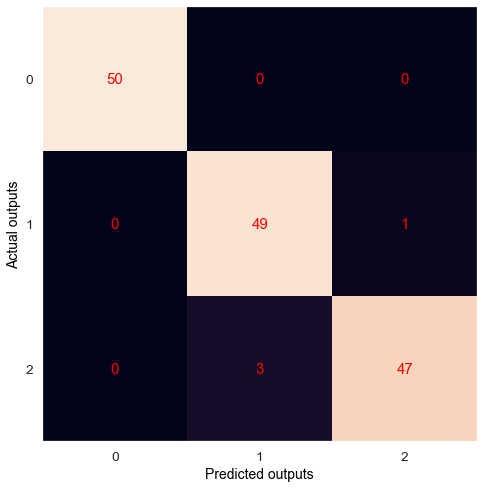

In [62]:
cm = confusion_matrix (y , RF.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

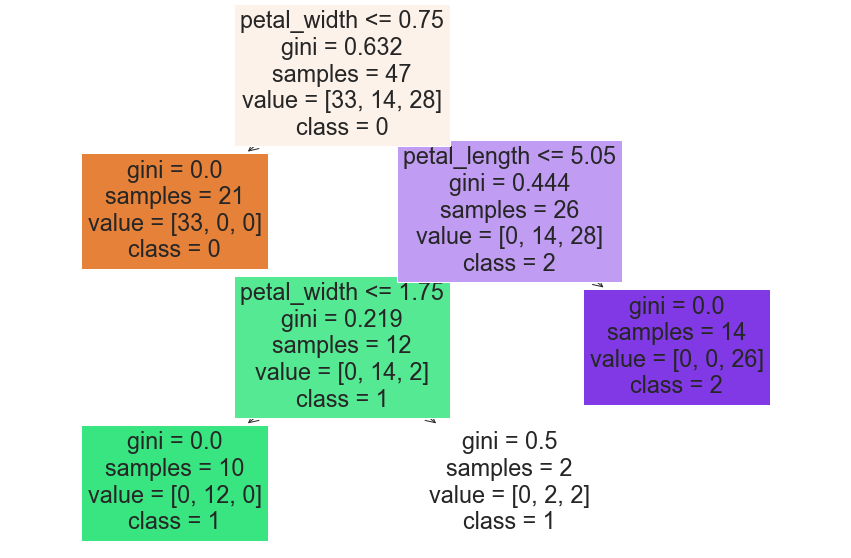

In [82]:
#white box one
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (15, 10))
plot = tree.plot_tree (RF.estimators_[5] , feature_names = F , class_names = T , filled = True)

## Conclusion

In [79]:
models = pd.DataFrame ({'Model' : ['Logestic Regression' , ' KNN' , 'Naive Bayes' , 'SVM' , 'Decision Tree' , 'Random Forest'] ,
                        'Precision' : [precision_score(y_test, y_pred_LR, average='weighted') , precision_score(y_test, y_pred_KNN, average='weighted') , precision_score(y_test, y_pred_NB, average='weighted') , precision_score(y_test, y_pred_SVM, average='weighted') , precision_score(y_test, y_pred_DT, average='weighted') , precision_score(y_test, y_pred_RF, average='weighted')] ,
                        'Recall' : [recall_score(y_test, y_pred_LR, average='weighted') , recall_score(y_test, y_pred_KNN, average='weighted') , recall_score(y_test, y_pred_NB, average='weighted') , recall_score(y_test, y_pred_SVM, average='weighted') , recall_score(y_test, y_pred_DT, average='weighted') , recall_score(y_test, y_pred_RF, average='weighted')] ,
                        'F1-score' : [f1_score(y_test, y_pred_LR, average='weighted') , f1_score(y_test, y_pred_KNN, average='weighted') , f1_score(y_test, y_pred_NB, average='weighted') , f1_score(y_test, y_pred_SVM, average='weighted') , f1_score(y_test, y_pred_DT, average='weighted') , f1_score(y_test, y_pred_RF, average='weighted')] ,
                        'Accuracy' : [accuracy_score(y_test, y_pred_LR) , accuracy_score(y_test, y_pred_KNN) , accuracy_score(y_test, y_pred_NB) , accuracy_score(y_test, y_pred_SVM) , accuracy_score(y_test, y_pred_DT) , accuracy_score(y_test, y_pred_RF)], 
                        'Err' : [np.std(LR_r) , np.std(KNN_r) , np.std(NB_r) , np.std(SVM_r) , np.std(DT_r) , np.std(RF_r)]})

print(tabulate(models, headers='keys', tablefmt='rst'))

====  ===================  ===========  ========  ==========  ==========  =========
  ..  Model                  Precision    Recall    F1-score    Accuracy        Err
====  ===================  ===========  ========  ==========  ==========  =========
   0  Logestic Regression     0.946667  0.946667    0.946667    0.946667  0.103359
   1  KNN                     0.936277  0.933333    0.932698    0.933333  0.0447214
   2  Naive Bayes             0.952941  0.946667    0.945909    0.946667  0.0426875
   3  SVM                     0.947955  0.946667    0.946367    0.946667  0.0326599
   4  Decision Tree           0.960281  0.96        0.959902    0.96      0.0326599
   5  Random Forest           0.936277  0.933333    0.932698    0.933333  0.0442217
====  ===================  ===========  ========  ==========  ==========  =========


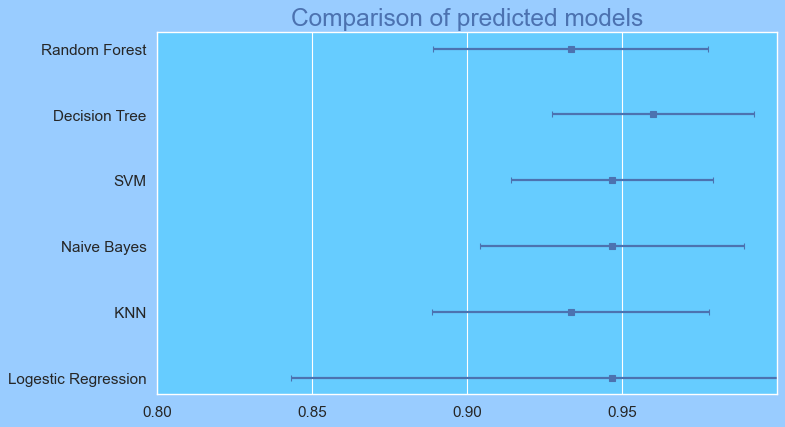

In [80]:
fig, ax = plt.subplots(figsize=(10, 6), dpi= 80, facecolor='#99ccff')

ax.set_facecolor('#66ccff')

ax.set_title('Comparison of predicted models', fontdict={'size':22} , color='b')

ax.errorbar(models['Accuracy'], models['Model'], xerr = models['Err'] , fmt='o', marker='s', color='b' 
            , linewidth=2, capsize=3)

ax.set(xlim=(0.8, 1), xticks=np.arange(0.8, 1, step = 0.05))

plt.grid(color = '#333366', axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()

#### All the models have good results in all four parameters (Recall, F1_score, Precision, Accuracy), but the Decision Tree Algorithm predicted slightly better than the rest of the models